In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import os

In [ ]:
#print(os.listdir('../input'))

In [ ]:
avocado = pd.read_csv("avocado.csv")
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
#cek dimensi
avocado.shape

(18249, 14)

In [ ]:
#Check tipe data
avocado.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [ ]:
#Check unique value tiap data (kecuali numerik)
for x in avocado.columns:
    print(x)
    print(avocado[x].unique())
    print("Total unique value : ",len(avocado[x].unique()))

Unnamed: 0
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52]
Total unique value :  53
Date
['2015-12-27' '2015-12-20' '2015-12-13' '2015-12-06' '2015-11-29'
 '2015-11-22' '2015-11-15' '2015-11-08' '2015-11-01' '2015-10-25'
 '2015-10-18' '2015-10-11' '2015-10-04' '2015-09-27' '2015-09-20'
 '2015-09-13' '2015-09-06' '2015-08-30' '2015-08-23' '2015-08-16'
 '2015-08-09' '2015-08-02' '2015-07-26' '2015-07-19' '2015-07-12'
 '2015-07-05' '2015-06-28' '2015-06-21' '2015-06-14' '2015-06-07'
 '2015-05-31' '2015-05-24' '2015-05-17' '2015-05-10' '2015-05-03'
 '2015-04-26' '2015-04-19' '2015-04-12' '2015-04-05' '2015-03-29'
 '2015-03-22' '2015-03-15' '2015-03-08' '2015-03-01' '2015-02-22'
 '2015-02-15' '2015-02-08' '2015-02-01' '2015-01-25' '2015-01-18'
 '2015-01-11' '2015-01-04' '2016-12-25' '2016-12-18' '2016-12-11'
 '2016-12-04' '2016-11-27' '2016-11-20' '2016-11-13' '2016-11-06'
 '20

In [ ]:
#check desc stat dari setiap variabel numerik
avocado.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


In [ ]:
#ubah tipe data sehingga sesuai
avocado["Date"]= avocado["Date"].astype("datetime64[ns]")
avocado["type"]= avocado["type"].astype("category")
avocado["region"]= avocado["region"].astype("category")
avocado["year"]= avocado["year"].astype("category")
avocado.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                  category
year                  category
region                category
dtype: object

In [ ]:
avocado = avocado.drop("Unnamed: 0", axis = 1) #Data ga diperlukan
avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [ ]:
avocado = avocado.rename(columns = {"4046": "PLU 4046"})
avocado = avocado.rename(columns = {"4225": "PLU 4225"})
avocado = avocado.rename(columns = {"4770": "PLU 4770"})
# Ini di rename biar ga bingung
avocado

,Date,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [ ]:
avocado.isnull().sum() #Data tidak ada missing value

Date            0
AveragePrice    0
Total Volume    0
PLU 4046        0
PLU 4225        0
PLU 4770        0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

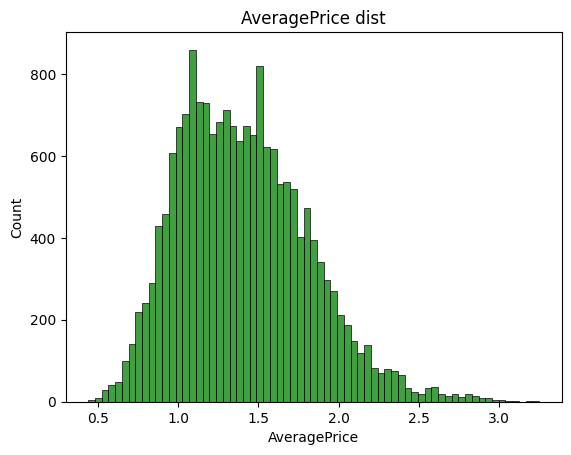

In [ ]:
#Visualisasi distribusi AveragePrice
sns.histplot(avocado['AveragePrice'], color='green')
plt.title("AveragePrice dist")
plt.show()

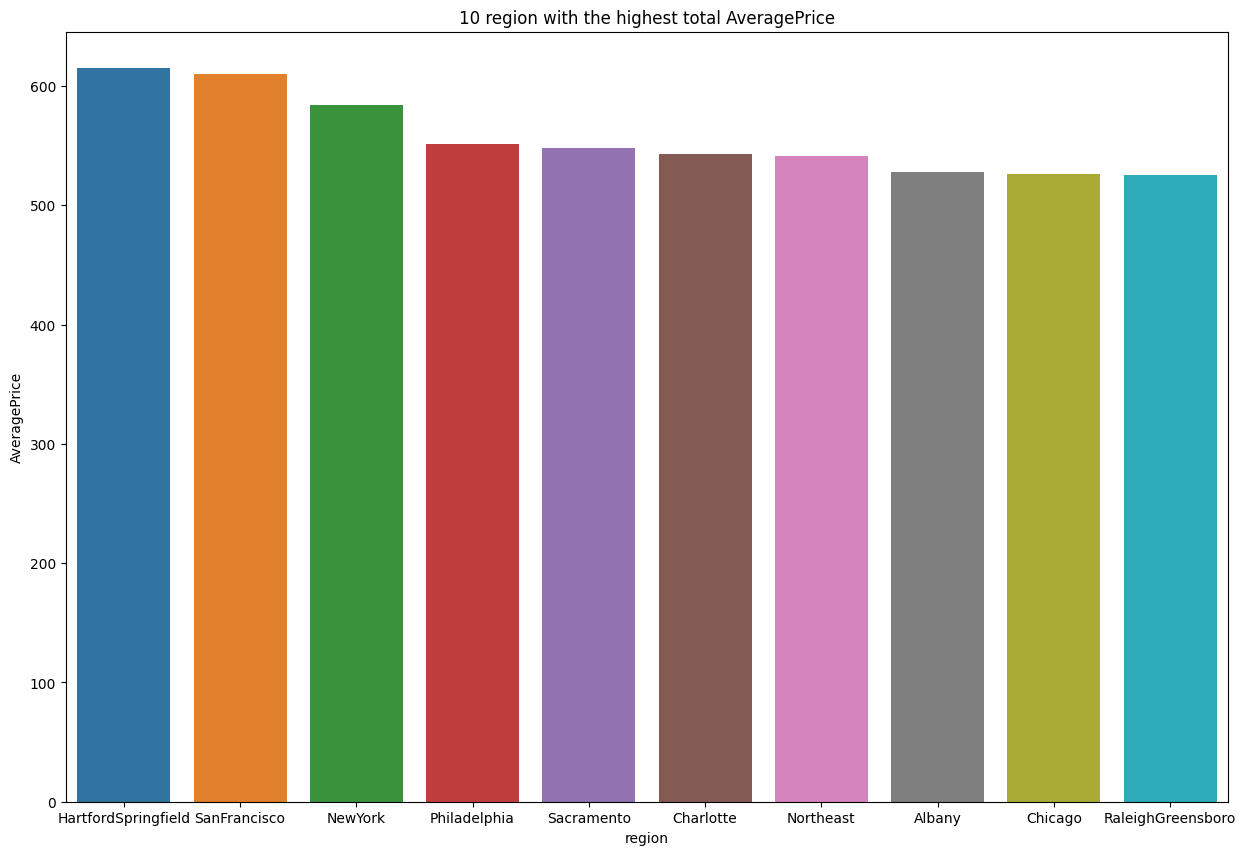

In [ ]:
df_avgP_reg = avocado.groupby('region')['AveragePrice'].sum().reset_index()

# Sort dataframe, untuk memudahkan visualisasi
df_avgP_reg = df_avgP_reg.sort_values('AveragePrice', ascending=False)

#select region berdasarkan keinginan
df_plot1 = df_avgP_reg.head(10)
df_plot2 = df_avgP_reg.tail(10)

#buat order, untuk menspesifikan kategori (region) yang ingin di plot
order = df_plot1['region']

# Plot
plt.figure(figsize=(15, 10))
sns.barplot(y=df_plot1['AveragePrice'], x=df_plot1['region'], order=order)
plt.title("10 region with the highest total AveragePrice")
plt.show()

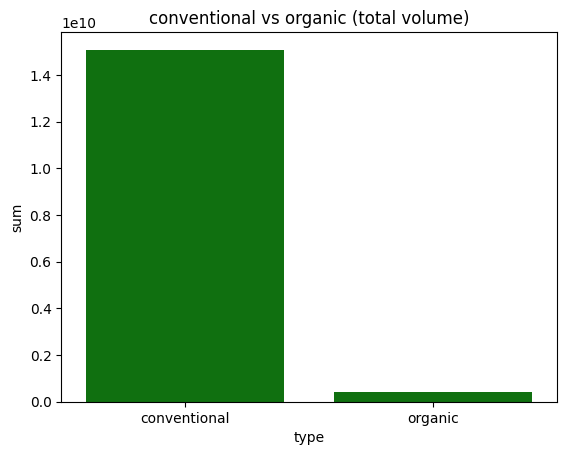

In [ ]:
#Perbandingan tipe 'conventional' dan 'organic'
df_plot3 = avocado.groupby('type')['Total Volume'].sum().reset_index(name='sum')
sns.barplot(x = df_plot3['type'], y = df_plot3['sum'], color='green')
plt.title("conventional vs organic (total volume)")
plt.show()

In [ ]:
#split day, month, year to help visualize the data
avocado['day'] = avocado['Date'].map(lambda d: d.day)
avocado['month'] = avocado['Date'].map(lambda m: m.month)
avocado['year'] = avocado['Date'].map(lambda y: y.year)

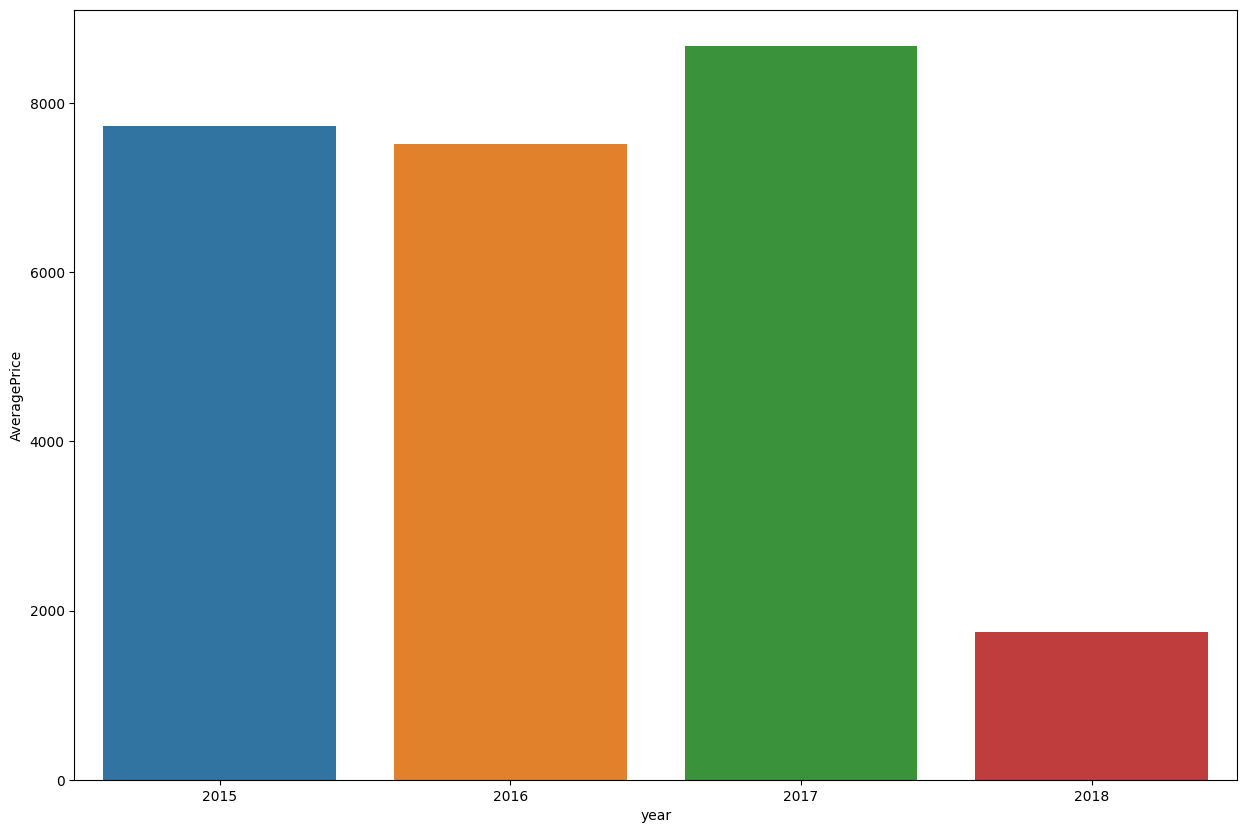

In [ ]:
#perbandingan average price dari tiap tahun
df_avgP_year = avocado.groupby('year')['AveragePrice'].sum().reset_index()

# Plot
plt.figure(figsize=(15, 10))
sns.barplot(y=df_avgP_year['AveragePrice'], x=df_avgP_year['year'])
plt.title("")
plt.show()

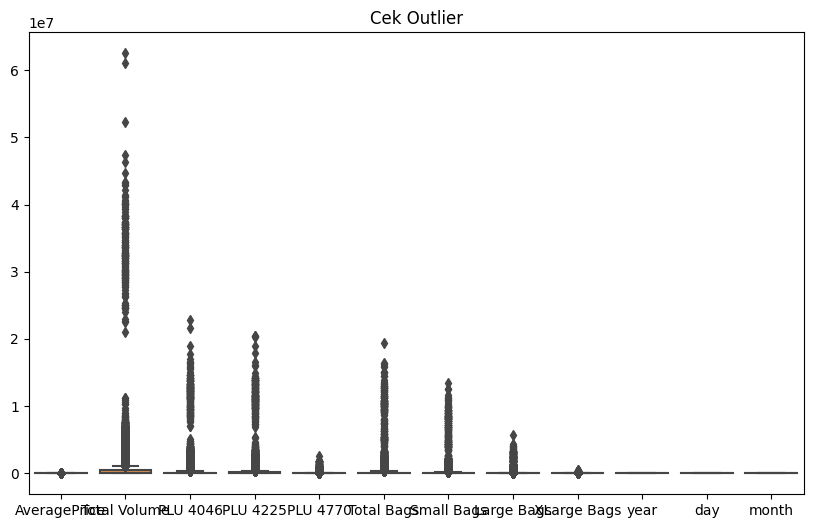

In [ ]:
cek_outlier = avocado.select_dtypes(include=['float64', 'int64']).columns
# Buat box plot untuk setiap kolom numerik dan untuk cek outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=avocado[cek_outlier])
plt.title('Cek Outlier')
plt.show()

In [ ]:
# Hitung IQR untuk setiap kolom numerik
Q1 = avocado[cek_outlier].quantile(0.25)
Q3 = avocado[cek_outlier].quantile(0.75)
IQR = Q3 - Q1

# Tentukan lokasi outlier berdasarkan IQR
outliers = ((avocado[cek_outlier] < (Q1 - 1.5 * IQR)) | (avocado[cek_outlier] > (Q3 + 1.5 * IQR))).any(axis=1)

# Tampilkan baris yang mengandung outlier
print("Baris yang mengandung outlier:")
print(avocado[outliers])

Baris yang mengandung outlier:
            Date  AveragePrice  Total Volume   PLU 4046  PLU 4225  PLU 4770  \
52    2015-12-27          0.99     386100.49  292097.36  27350.92    297.90   
54    2015-12-13          0.96     417772.47  324932.28  31019.08    275.80   
55    2015-12-06          1.07     357636.82  283024.01  23740.85    181.92   
60    2015-11-01          0.99     419088.74  290457.50  62980.07    252.79   
66    2015-09-20          0.93     516432.60  346118.51  82762.72   1349.41   
...          ...           ...           ...        ...       ...       ...   
18228 2018-03-04          1.46     347373.17   25990.60  71213.19     79.01   
18229 2018-02-25          1.49     301985.61   34200.18  49139.34     85.58   
18231 2018-02-11          1.47     275248.53   24732.55  61713.53    243.00   
18232 2018-02-04          1.41     283378.47   22474.66  55360.49    133.41   
18236 2018-01-07          1.48     297190.60   34734.97  62967.74    157.77   

       Total Bags  S

In [ ]:
#Hapus baris yang mengandung outlier
avocado_clean = avocado.copy()
avocado_clean

,Date,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,day,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,1
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,1
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,1


In [ ]:
avocado_clean = avocado[~outliers]
avocado_clean

,Date,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,day,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,1
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,1
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,1


In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def compare_regression_models(X_train, X_test, y_train, y_test, **model_kwargs):
    """
    Compare different regression models on a given dataset.

    Parameters:
    - X_train: Training features
    - X_test: Testing features
    - y_train: Training target variable
    - y_test: Testing target variable
    - **model_kwargs: Additional keyword arguments for model parameters

    Returns:
    - DataFrame containing evaluation metrics for each model
    """

    # Initialize models with additional kwargs
    models = {
        'Decision Tree': DecisionTreeRegressor(**model_kwargs.get('DecisionTree', {})),
        'Random Forest': RandomForestRegressor(**model_kwargs.get('RandomForest', {})),
        'Gradient Boosting': GradientBoostingRegressor(**model_kwargs.get('GradientBoosting', {})),
        'K-Nearest Neighbors': KNeighborsRegressor(**model_kwargs.get('KNN', {})),
        'XGBoost': XGBRegressor(**model_kwargs.get('XGBoost', {}))
    }

    # Train and evaluate each model
    results = {'Model': [], 'RMSE': [], 'MAE': [], 'R2': []}

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Evaluate metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results['Model'].append(model_name)
        results['RMSE'].append(rmse)
        results['MAE'].append(mae)
        results['R2'].append(r2)

    # Create a DataFrame for results
    results_df = pd.DataFrame(results)

    return results_df

In [ ]:
# Split into training, validation, and test sets
avocado.set_index('Date', inplace=True)
X = avocado.drop(['AveragePrice'], axis=1)
y = avocado['AveragePrice']

# 80 : 20 training testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_copy, X_test_copy = X_train.copy(), X_test.copy()

In [ ]:
avocado_clean.set_index('Date', inplace=True)
X_clean = avocado_clean.drop(['AveragePrice'], axis=1)
y_clean = avocado_clean['AveragePrice']

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14599, 13)
(3650, 13)
(14599,)
(3650,)


In [ ]:
print(X_train_clean.shape)
print(X_test_clean.shape)
print(y_train_clean.shape)
print(y_test_clean.shape)

(9230, 13)
(2308, 13)
(9230,)
(2308,)


In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encode_columns(train_data, test_data, columns):
    # Make a copy of the original dataframes to avoid modifying them directly
    X_train = train_data.copy()
    X_test = test_data.copy()

    # Initialize the label encoder
    label_encoder = LabelEncoder()

    # Loop through each column and apply label encoding
    for col in columns:
        # Fit and transform on the training set
        X_train[col] = label_encoder.fit_transform(X_train[col])

        # Transform the testing set using the same encoder
        X_test[col] = label_encoder.transform(X_test[col])

    return X_train, X_test

In [ ]:
from sklearn.preprocessing import StandardScaler

def scale_numerical_columns(train_data, test_data):
    # Make a copy of the original dataframes to avoid modifying them directly
    X_train = train_data.copy()
    X_test = test_data.copy()
    numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
    # Initialize the scaler
    scaler = StandardScaler()

    # Fit and transform on the training set
    X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

    # Transform the testing set using the same scaler
    X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

    return X_train, X_test


In [ ]:
columns = ['type', 'region']
le = LabelEncoder()

for col in columns:
  # Fit and transform on the training set
  X_train_copy[col] = le.fit_transform(X_train[col])

  # Transform the testing set using the same encoder
  X_test_copy[col] = le.transform(X_test[col])

  le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
  print(le_name_mapping)

{'conventional': 0, 'organic': 1}
{'Albany': 0, 'Atlanta': 1, 'BaltimoreWashington': 2, 'Boise': 3, 'Boston': 4, 'BuffaloRochester': 5, 'California': 6, 'Charlotte': 7, 'Chicago': 8, 'CincinnatiDayton': 9, 'Columbus': 10, 'DallasFtWorth': 11, 'Denver': 12, 'Detroit': 13, 'GrandRapids': 14, 'GreatLakes': 15, 'HarrisburgScranton': 16, 'HartfordSpringfield': 17, 'Houston': 18, 'Indianapolis': 19, 'Jacksonville': 20, 'LasVegas': 21, 'LosAngeles': 22, 'Louisville': 23, 'MiamiFtLauderdale': 24, 'Midsouth': 25, 'Nashville': 26, 'NewOrleansMobile': 27, 'NewYork': 28, 'Northeast': 29, 'NorthernNewEngland': 30, 'Orlando': 31, 'Philadelphia': 32, 'PhoenixTucson': 33, 'Pittsburgh': 34, 'Plains': 35, 'Portland': 36, 'RaleighGreensboro': 37, 'RichmondNorfolk': 38, 'Roanoke': 39, 'Sacramento': 40, 'SanDiego': 41, 'SanFrancisco': 42, 'Seattle': 43, 'SouthCarolina': 44, 'SouthCentral': 45, 'Southeast': 46, 'Spokane': 47, 'StLouis': 48, 'Syracuse': 49, 'Tampa': 50, 'TotalUS': 51, 'West': 52, 'WestTexNew

In [ ]:
X_train_encode, X_test_encode = X_train.copy(), X_test.copy()
X_train_encode_scale, X_test_encode_scale = X_train.copy(), X_test.copy()
X_train_clean_scale, X_test_clean_scale = X_train_clean.copy(), X_test_clean.copy()

In [ ]:
column_to_encode = ['type', 'region']
X_train_encode, X_test_encode = label_encode_columns(X_train_encode, X_test_encode, column_to_encode)
X_train_clean, X_test_clean, = label_encode_columns(X_train_clean, X_test_clean, column_to_encode)
X_train_encode_scale, X_test_encode_scale = label_encode_columns(X_train_encode_scale, X_test_encode_scale, column_to_encode)
X_train_clean_scale, X_test_clean_scale = label_encode_columns(X_train_clean_scale, X_test_clean_scale, column_to_encode)

In [ ]:
# Lakukan Standard Scaling pada kolom-kolom numerik
X_train_encode_scale, X_test_encode_scale = scale_numerical_columns(X_train_encode_scale, X_test_encode_scale)
X_train_clean_scale, X_test_clean_scale = scale_numerical_columns(X_train_clean_scale, X_test_clean_scale)

In [ ]:
avocado.corr()['AveragePrice'].sort_values(ascending=False)

<ipython-input-272-1db6e63f3161>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  avocado.corr()['AveragePrice'].sort_values(ascending=False)


AveragePrice    1.000000
month           0.162409
year            0.093197
day             0.027386
XLarge Bags    -0.117592
PLU 4225       -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
PLU 4770       -0.179446
Total Volume   -0.192752
PLU 4046       -0.208317
Name: AveragePrice, dtype: float64

In [ ]:
avocado_clean.corr()['AveragePrice'].sort_values(ascending=False)


<ipython-input-273-a155b1b41e2a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  avocado_clean.corr()['AveragePrice'].sort_values(ascending=False)


AveragePrice    1.000000
month           0.144974
year            0.076743
day             0.018997
XLarge Bags    -0.171026
PLU 4225       -0.265976
Large Bags     -0.287150
PLU 4770       -0.304410
Small Bags     -0.314898
Total Bags     -0.358109
PLU 4046       -0.384518
Total Volume   -0.405764
Name: AveragePrice, dtype: float64

In [ ]:
from sklearn.decomposition import PCA

def apply_pca_to_split_data(X_train, X_test, n_components=None, random_state=None):
    """
    Apply PCA to split data (X_train and X_test).

    Parameters:
    - X_train: pandas DataFrame, training set
    - X_test: pandas DataFrame, testing set
    - numerical_columns: list of column names containing numerical features (default: None)
    - n_components: int or float, the number of components to retain (default: None)
    - random_state: int or None, random state for reproducibility (default: None)

    Returns:
    - X_train_pca: pandas DataFrame with principal components for the training set
    - X_test_pca: pandas DataFrame with principal components for the testing set
    """

    # Make a copy of the original DataFrames
    X_train_pca = X_train.copy()
    X_test_pca = X_test.copy()

    numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

    # Apply PCA on the training set
    pca = PCA(n_components=n_components, random_state=random_state)
    X_train_pca_result = pca.fit_transform(X_train_pca[numerical_columns])

    # Apply PCA transformation on the testing set
    X_test_pca_result = pca.transform(X_test_pca[numerical_columns])

    # Create DataFrames with principal components for both sets
    pca_columns = [f'PC_{i+1}' for i in range(X_train_pca_result.shape[1])]
    X_train_pca = pd.DataFrame(data=X_train_pca_result, columns=pca_columns, index=X_train.index)
    X_test_pca = pd.DataFrame(data=X_test_pca_result, columns=pca_columns, index=X_test.index)

    return X_train_pca, X_test_pca

In [ ]:
X_train_pca_result, X_test_pca_result = apply_pca_to_split_data(X_train_encode_scale, X_test_encode_scale, n_components=2, random_state=42)
X_train_pca_clean_result, X_test_pca_clean_result = apply_pca_to_split_data(X_train_clean_scale, X_test_clean_scale, n_components=2, random_state=42)

In [ ]:
# Additional kwargs for model customization
model_customization = {
    'DecisionTree': {'max_depth': 3},
    'RandomForest': {'n_estimators': 100, 'max_depth': None},
    'GradientBoosting': {'n_estimators': 100, 'learning_rate': 0.1},
    'KNN': {'n_neighbors': 5},
    'XGBoost': {'n_estimators': 100, 'learning_rate': 0.1}
}

In [ ]:
# Compare models with additional kwargs for customization
results_encode = compare_regression_models(X_train_encode, X_test_encode, y_train, y_test, **model_customization)
print("Model Evaluation with Encoding Results:")
print(results_encode)

Model Evaluation with Encoding Results:
                 Model      RMSE       MAE        R2
0        Decision Tree  0.293927  0.225958  0.462292
1        Random Forest  0.132179  0.092857  0.891260
2    Gradient Boosting  0.203198  0.153546  0.743015
3  K-Nearest Neighbors  0.244242  0.173431  0.628713
4              XGBoost  0.137122  0.101339  0.882974


In [ ]:
# Compare models with additional kwargs for customization
results_encode_scale = compare_regression_models(X_train_encode_scale, X_test_encode_scale, y_train, y_test, **model_customization)
print("Model Evaluation with Encoding and Scaling Results:")
print(results_encode_scale)

Model Evaluation with Encoding and Scaling Results:
                 Model      RMSE       MAE        R2
0        Decision Tree  0.293927  0.225958  0.462292
1        Random Forest  0.132580  0.092794  0.890598
2    Gradient Boosting  0.203957  0.153742  0.741093
3  K-Nearest Neighbors  0.277964  0.201701  0.519112
4              XGBoost  0.136727  0.101470  0.883647


In [ ]:
results_encode_scale_PCA = compare_regression_models(X_train_pca_result, X_test_pca_result, y_train, y_test, **model_customization)
print("Model Evaluation with Encoding and Scaling PCA Results:")
print(results_encode_scale_PCA)

Model Evaluation with Encoding and Scaling PCA Results:
                 Model      RMSE       MAE        R2
0        Decision Tree  0.322091  0.250428  0.354311
1        Random Forest  0.280838  0.207094  0.509114
2    Gradient Boosting  0.311041  0.240738  0.397851
3  K-Nearest Neighbors  0.293743  0.219517  0.462966
4              XGBoost  0.297812  0.228254  0.447983


In [ ]:
# Compare models with additional kwargs for customization
results_encode_clean = compare_regression_models(X_train_clean, X_test_clean, y_train_clean, y_test_clean, **model_customization)
print("Model Evaluation with Encoded Clean Dataset Results:")
print(results_encode_clean)

Model Evaluation with Encoded Clean Dataset Results:
                 Model      RMSE       MAE        R2
0        Decision Tree  0.275619  0.216849  0.382255
1        Random Forest  0.139079  0.101144  0.842705
2    Gradient Boosting  0.190710  0.147160  0.704240
3  K-Nearest Neighbors  0.234025  0.175469  0.554634
4              XGBoost  0.140820  0.106529  0.838742


In [ ]:
results_encode_clean_scaled = compare_regression_models(X_train_clean_scale, X_test_clean_scale, y_train_clean, y_test_clean, **model_customization)
print("Model Evaluation with Encoded Clean Scaled Dataset Results:")
print(results_encode_clean_scaled)

Model Evaluation with Encoded Clean Scaled Dataset Results:
                 Model      RMSE       MAE        R2
0        Decision Tree  0.275619  0.216849  0.382255
1        Random Forest  0.139698  0.101509  0.841301
2    Gradient Boosting  0.190715  0.147151  0.704225
3  K-Nearest Neighbors  0.236918  0.177384  0.543557
4              XGBoost  0.140820  0.106529  0.838742


In [ ]:
results_encode_clean_scaled_PCA = compare_regression_models(X_train_pca_clean_result, X_test_pca_clean_result, y_train_clean, y_test_clean, **model_customization)
print("Model Evaluation with Encoded Clean Scaled and PCA Dataset Results:")
print(results_encode_clean_scaled_PCA)

Model Evaluation with Encoded Clean Scaled and PCA Dataset Results:
                 Model      RMSE       MAE        R2
0        Decision Tree  0.300272  0.237476  0.266806
1        Random Forest  0.306696  0.238850  0.235098
2    Gradient Boosting  0.292207  0.229538  0.305662
3  K-Nearest Neighbors  0.308381  0.238209  0.226669
4              XGBoost  0.289823  0.227561  0.316945


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

X_train, X_test, y_train, y_test = X_train_encode_scale, X_test_encode_scale, y_train, y_test

# XGBoost
xgb_param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 1),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

xgb_reg = XGBRegressor(objective='reg:squarederror')

xgb_random_search = RandomizedSearchCV(
    xgb_reg, param_distributions=xgb_param_dist, n_iter=20,
    cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1
)

xgb_random_search.fit(X_train, y_train)

# RandomForest
rf_param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'bootstrap': [True, False]
}

rf_reg = RandomForestRegressor()

rf_random_search = RandomizedSearchCV(
    rf_reg, param_distributions=rf_param_dist, n_iter=20,
    cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1
)

rf_random_search.fit(X_train, y_train)

# Get the best hyperparameters for XGBoost and RandomForest
best_params_xgb = xgb_random_search.best_params_
best_params_rf = rf_random_search.best_params_

print("Best Hyperparameters for XGBoost:", best_params_xgb)
print("Best Hyperparameters for RandomForest:", best_params_rf)

# You can now use the best models for prediction
best_xgb_model = xgb_random_search.best_estimator_
best_rf_model = rf_random_search.best_estimator_

# Example: Predict with the best XGBoost model
y_pred_xgb = best_xgb_model.predict(X_test)

# Example: Predict with the best RandomForest model
y_pred_rf = best_rf_model.predict(X_test)

Best Hyperparameters for XGBoost: {'colsample_bytree': 0.5909124836035503, 'gamma': 0.18340450985343382, 'learning_rate': 0.1012726728878613, 'max_depth': 8, 'n_estimators': 138, 'reg_alpha': 0.2912291401980419, 'reg_lambda': 0.6118528947223795, 'subsample': 0.569746930326021}
Best Hyperparameters for RandomForest: {'bootstrap': True, 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 14, 'min_samples_split': 9, 'n_estimators': 131}


In [ ]:
# Evaluate metrics
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

results = {
    'Metric': ['RMSE', 'MAE', 'R2'],
    'XGBoost': [rmse_xgb, mae_xgb, r2_xgb],
    'RandomForest': [rmse_rf, mae_rf, r2_rf]
}

# Create a DataFrame
metrics_df = pd.DataFrame(results)

In [ ]:
metrics_df

,Metric,XGBoost,RandomForest
0,RMSE,0.147140,0.183843
1,MAE,0.110592,0.136933
2,R2,0.865249,0.789640
